# Image Stitching (Python)

## Usage
This code snippet provides an overall code structure and some interactive plot interfaces for the Stitching Pairs of Images section of MP 3. In main function, we outline the required functionalities step by step. Feel free to make modifications on the starter code if it's necessary.

## Package installation
- `opencv`
- `numpy`
- `skimage`
- `scipy`

# Common imports

In [5]:
import numpy as np
# import skimage 
from skimage import io
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
import scipy

# Helper functions

In [50]:
def imread(fname):
    """
    read image into np array from file
    """
    return skimage.io.imread(fname)

def imread_bw(fname):
    """
    read image as gray scale format
    """
    return cv2.cvtColor(imread(fname), cv2.COLOR_BGR2GRAY)

def imshow(img):
    """
    show image
    """
    skimage.io.imshow(img)
    
def get_sift_data(img):
    """
    detect the keypoints and compute their SIFT descriptors with opencv library
    """
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return kp, des

def plot_inlier_matches(ax, img1, img2, inliers):
    """
    plot the match between two image according to the matched keypoints
    :param ax: plot handle
    :param img1: left image
    :param img2: right image
    :inliers: x,y in the first image and x,y in the second image (Nx4)
    """
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')
    
    ax.plot(inliers[:,0], inliers[:,1], '+r')
    ax.plot(inliers[:,2] + img1.shape[1], inliers[:,3], '+r')
    ax.plot([inliers[:,0], inliers[:,2] + img1.shape[1]],
            [inliers[:,1], inliers[:,3]], 'r', linewidth=0.4)
    ax.axis('off')

# Your implementations

In [140]:
# def flatten_to_2d(idx, width):
#     return divmod(idx, width)

def get_best_matches(img1, img2, num_matches):
    kp1, des1 = get_sift_data(img1)
    kp2, des2 = get_sift_data(img2)
    kp1, kp2 = np.array(kp1), np.array(kp2)
    
    # Find distance between descriptors in images
    dist = scipy.spatial.distance.cdist(des1, des2, 'sqeuclidean')

    # Select num_matches smallest value from dist
    idx = np.argpartition(dist, range(num_matches), axis=None)[:num_matches]

    # Get row & col index of these value
    r, c = divmod(idx, dist.shape[1])

    # Create empty data array
    data = np.empty((0,4), float)
    for i in range(len(r)):
        # In each row, first two elements are (x, y) of keypoint on img1,
        # last two elements are (x, y) of keypoint on img2
        entry = np.hstack([kp1[r[i]].pt, kp2[c[i]].pt]).reshape(1,-1)
        # Append these data to the array
        data = np.append(data, entry, axis=0)

    return data

def ransac(imag1, img2):
    """
    write your ransac code to find the best model, inliers, and residuals
    """
    # <YOUR CODE>
    pass

def compute_homography(img1, img2):
    """
    write your code to compute homography according to the matches
    """
    # <YOUR CODE>
    pass

def warp_images(img1, img2):
    """
    write your code to stitch images together according to the homography
    """
    # <YOUR CODE>
    pass

# Main functions

#### Load images

In [141]:
img1 = imread('./stitch/left.jpg')
img2 = imread('./stitch/right.jpg')

#### Part (3) compute and display the initial SIFT matching result

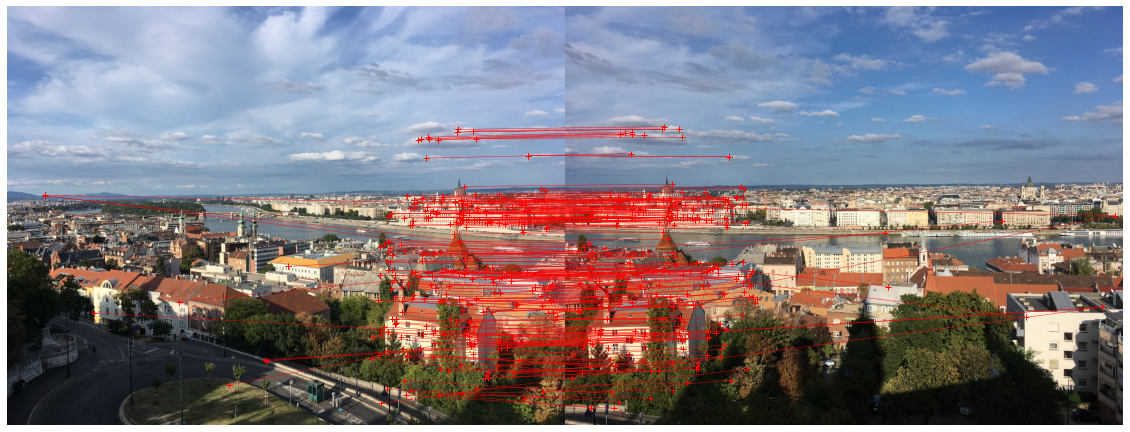

In [145]:
data = get_best_matches(img1, img2, 300)
fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, img1, img2, data)
fig.savefig('sift_match.png', bbox_inches='tight')

#### Part (4) performn RANSAC to get the homography and inliers

In [143]:
# display the inlier matching, report the average residual
# <YOUR CODE>
# print("Average residual:", np.average(best_model_errors))
# print("Inliers:", max_inliers)
# fig.savefig('ransac_match.pdf', bbox_inches='tight')

#### Part (5) warp images to stitch them together

In [144]:
# display and report the stitching results
# <YOUR CODE>
# cv2.imwrite('stitched_images.jpg', im[:,:,::-1]*255., 
#             [int(cv2.IMWRITE_JPEG_QUALITY), 90])